In [1]:
%%HTML
<style>
div.prompt {display:none}
</style>

# Analiza danych o samobójstwach
Matuesz Klaczyński  
Informatyka rok III    
Nr albumu 136735

Dane pochodzą ze  [zbioru udostępnionego na kaggle]( https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) i są na podstawie danych udostępnionych przez agencje WHO, są to dane z __obserwacji__.
Zawierają się one w latach 1985-2016 i przedstawiają informacje o ilości samobójstw w danychm kraju i roku, populacje kraju współczynniku  samobójstw/100tysięcy populacji, płeć denata oraz jego kategorię wiekową a takżę _nazwę  pokolenia_ z którego  pochodził.  
Dane również zawierają dwa wskaźniki rozowju gospdarczego, prostszy GDP (ang. Gross Domestic Product) dla danego kraju, GDP przypadające na mieszkańca i drugi HDI (ang. Human Development Index) dla danego kraju.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

Do danych dodałem kontynent mapując nazwę kraju z pierwszych danych do [dataFrame'a](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list) innych danych w którym znalazły się informacje o kontynencie.  

Usunąłem także rok 2016 z pierwotnych danych ponieważ zauważyłem znaczny spadek w współczynniku samobójstwo/100tysięcy populacji. Uznałem, że może być to spowodwane okresem zbierania tych danych który miał miejsce w roku 2016 i nieudokumentowaną jeszcze dokładna ilością statystyk. 

In [3]:
data = pd.read_csv("master.csv")
data = data.sort_values(["country", "year"])
del data["country-year"]
data = data.drop(data[data.year >= 2016].index)
data.reset_index(inplace=True)
continents = pd.read_csv("contintnes_country.csv")

#Adds column "continent" to main data 
for i in range(len(data)): 
    search_country = data.at[i, "country"]
    for j, country in enumerate(continents.Country_Name.values):
        if country.startswith(search_country):
            continent = continents["Continent_Name"][j]
            data.at[i, "continent"] = continent

In [4]:
data.tail()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
27655,27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X,Asia
27656,27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent,Asia
27657,27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z,Asia
27658,27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z,Asia
27659,27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,0.675,"63,067,077,179",2309,Boomers,Asia


### Smobójstwa w skali rocznej
Ponieważ pojawiają się braki w niektórych latach i z uwagi na zwiększającą się całkowitą populacje z 5 miliardów w 1985 do 7 miliardów w 2015 postanowiłem umieścić na wykresie średnią z współczynnika samobójstw/100tysięcy populacji wszystkich krajów w danym roku.

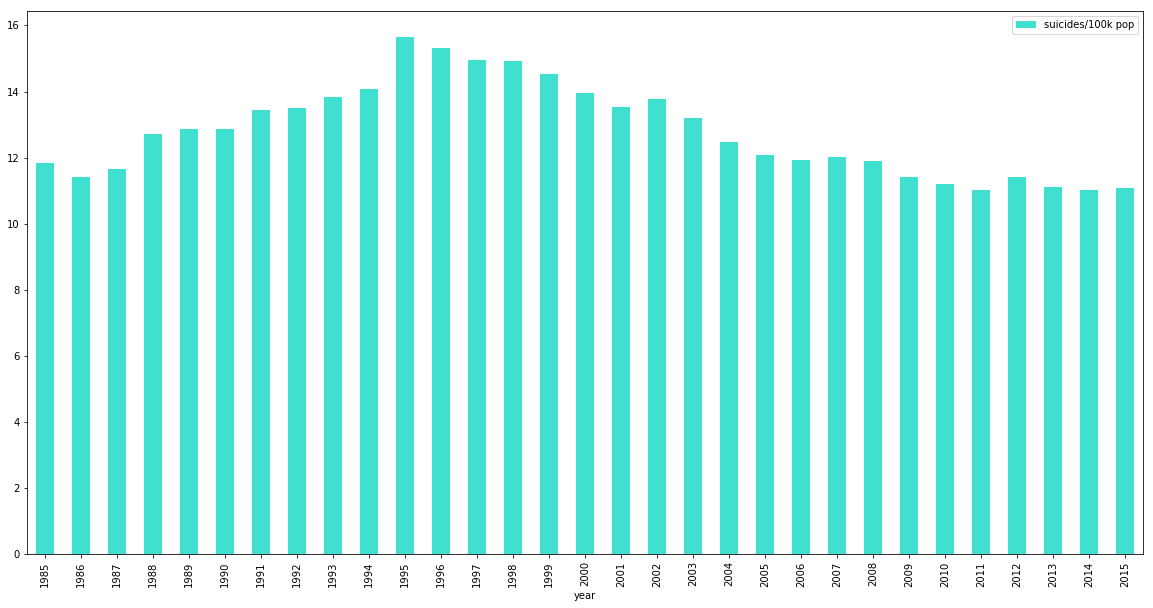

In [5]:
by_year = data.groupby(["year"]).mean()
by_year.plot.bar(y="suicides/100k pop", color="turquoise", figsize=(20, 10))
plt.show()

Na wykresie możemy zauważyć wzrost od roku 1985 i gwałtowny skok w roku 1995. Od tego też roku dane mają trend spadkowy.  
Nie jestem w stanie powiedzieć czemu w roku 1995 wydarzył się taki skok.

### Samobójstwa według płci  
Zastanawiałem się która płeć popełnia więcej samobójstw wiec posegregowałem dane rokiem oraz według płci i umieściłem je na jednym wykresie.

In [6]:
by_year_sex = data.groupby(["year", "sex"]).mean()
by_year_sex.head()

index  suicides_no    population  suicides/100k pop  \
year sex                                                                  
1985 female  13411.246528   112.774306  1.781295e+06           5.776910   
     male    13409.086806   290.222222  1.720788e+06          17.875486   
1986 female  14059.954861   117.541667  1.821062e+06           5.812674   
     male    14057.711806   301.451389  1.755013e+06          17.033993   
1987 female  13731.277778   108.043210  1.725876e+06           5.732130   

             HDI for year  gdp_per_capita ($)  
year sex                                       
1985 female      0.699162         6091.229167  
     male        0.699162         6091.229167  
1986 female           NaN         7126.104167  
     male             NaN         7126.104167  
1987 female           NaN         8712.592593

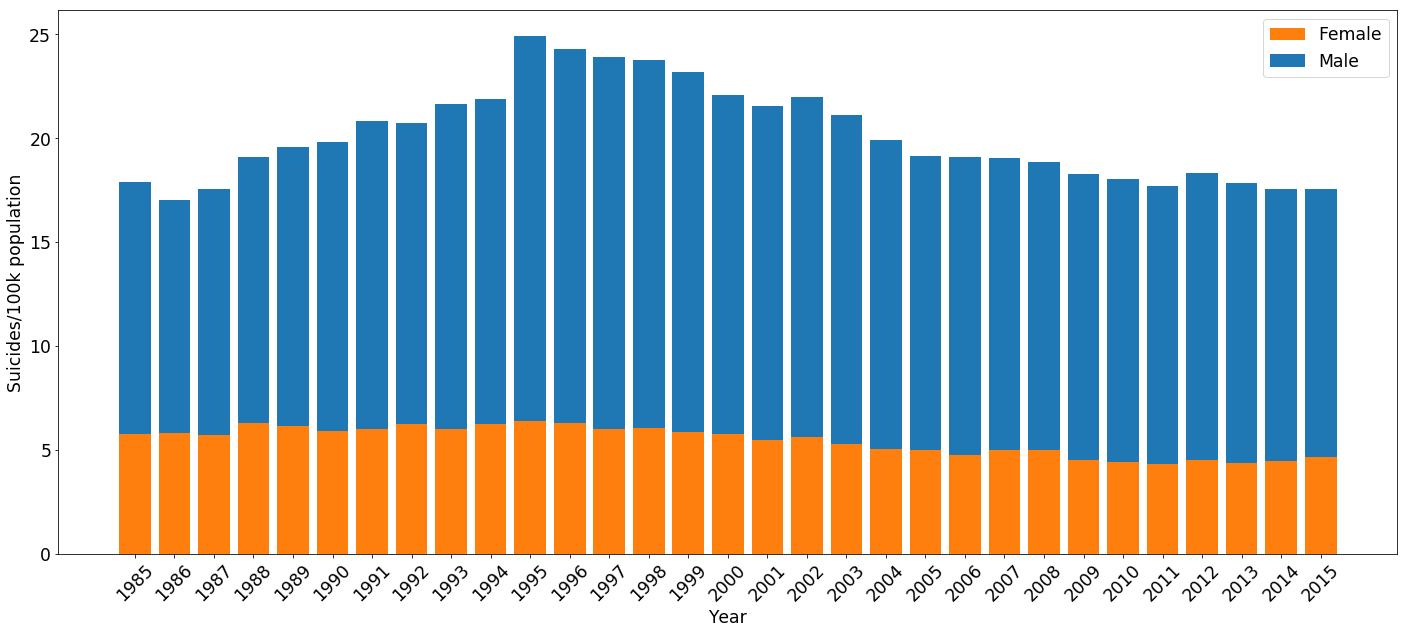

In [7]:
fig, ax = plt.subplots(figsize=(24,10))
x = by_year_sex.unstack()["suicides/100k pop"]["male"].index
p2 = ax.bar(x, by_year_sex.unstack()["suicides/100k pop"]["male"])
p1 = ax.bar(x, by_year_sex.unstack()["suicides/100k pop"]["female"])
ax.set_ylabel("Suicides/100k population", size="xx-large")
ax.set_xlabel("Year", size="xx-large")
ax.legend((p1[0], p2[0]), ("Female", "Male"), fontsize="xx-large")
ax.set_xticks(x)
plt.xticks(rotation=45, size="xx-large")
plt.yticks(size="xx-large")
plt.show()

In [8]:
femals_sucidies = by_year_sex.unstack()["suicides/100k pop"]["female"]
male_suicides = by_year_sex.unstack()["suicides/100k pop"]["male"]

ratio = male_suicides.mean()/femals_sucidies.mean()
ratio

3.6882831679555816

Uśrednione prawdopodobieństwo popełniania samobójstwa przez mężczyznę jest __3.68 razy większe__ niż przez kobietę. Z wykresu dowiedziałem się że ilość samobójstw mężczyzn odznacza się większą zmiennością w czasie kiedy ilość samobójstw kobiet jest na równym poziomie a od roku 1995 powoli maleje.

### Smobójstwa według kategori wiekowej  

Dysponując 5 kategoriami wiekowymi 15-24 lat, 25-34 lat, 35-54 lat, 55-74 lat, 75+ lat postanowiłem sprawdzić w której grupie wiekowej istnieje największa liczba samobójców.  
Zauważyłem także błąd w danych związany z etykietowaniem danych ponieważ niektóre dane miały kategorie wiekową od 5-14 lat, jestem raczej przekonany, że autor danych miał na myśli kategorie wiekową 15-24 lat.

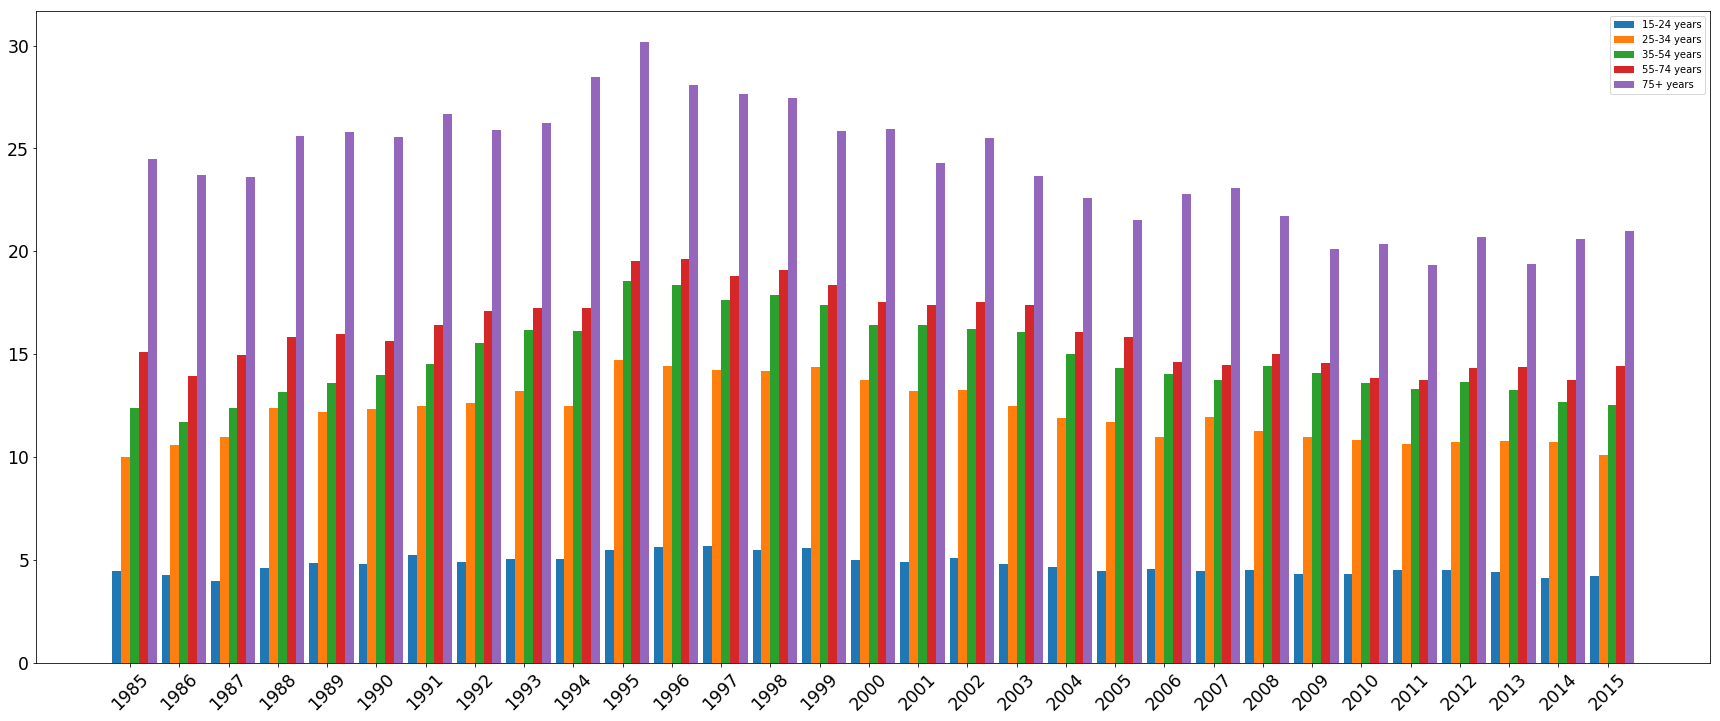

In [9]:
#Relabel 5-14 years to 15-24 years
for i in range(len(data)): 
    if data.at[i, "age"] == "5-14 years":
        data.at[i, "age"] = "15-24 years"

by_year_age = data.groupby(["year", "age"]).mean()
fig, ax = plt.subplots( figsize=(30, 12))
x = by_year_age.unstack()["suicides/100k pop"].index
y = by_year_age.unstack()["suicides/100k pop"]
width = 0.18

years_interval = ["15-24 years","25-34 years" , "35-54 years", "55-74 years", "75+ years"] 
bars = []
for i, interval in enumerate(years_interval, -2):
    shift = width*i
    plot = ax.bar(x+shift, y[interval], width=width, align="edge", )
    bars.append(plot)
    
ax.legend(years_interval, )
ax.set_xticks(x)
plt.xticks(rotation=45, fontsize="xx-large", color="black")
plt.yticks(fontsize="xx-large")

plt.show()

Ku mojemu zdziwieniu okazało się że najwięcej osób popełniających samobójstwa jest w najstarszej grupie wiekowej.  
Jest to dla mnie zaskoczeniem ponieważ spodziewałem się osób między rokiem 15-24 jak największej grupy samobójców.

### Samobójstwa według kontynentu

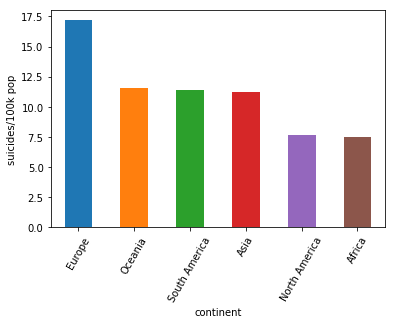

In [10]:
by_continent = data.groupby(["continent"]).mean()
by_continent = by_continent.sort_values(by=["suicides/100k pop"], ascending=False)
by_continent["suicides/100k pop"].plot.bar()
plt.ylabel("suicides/100k pop")
plt.xticks(rotation=60)
plt.show()

Ku mojemu już kolejnemu zaskoczeniu Europa w znacznym stopniu wyróżnia się na tle innych kontynentów.

### Samobójstwa według kraju 

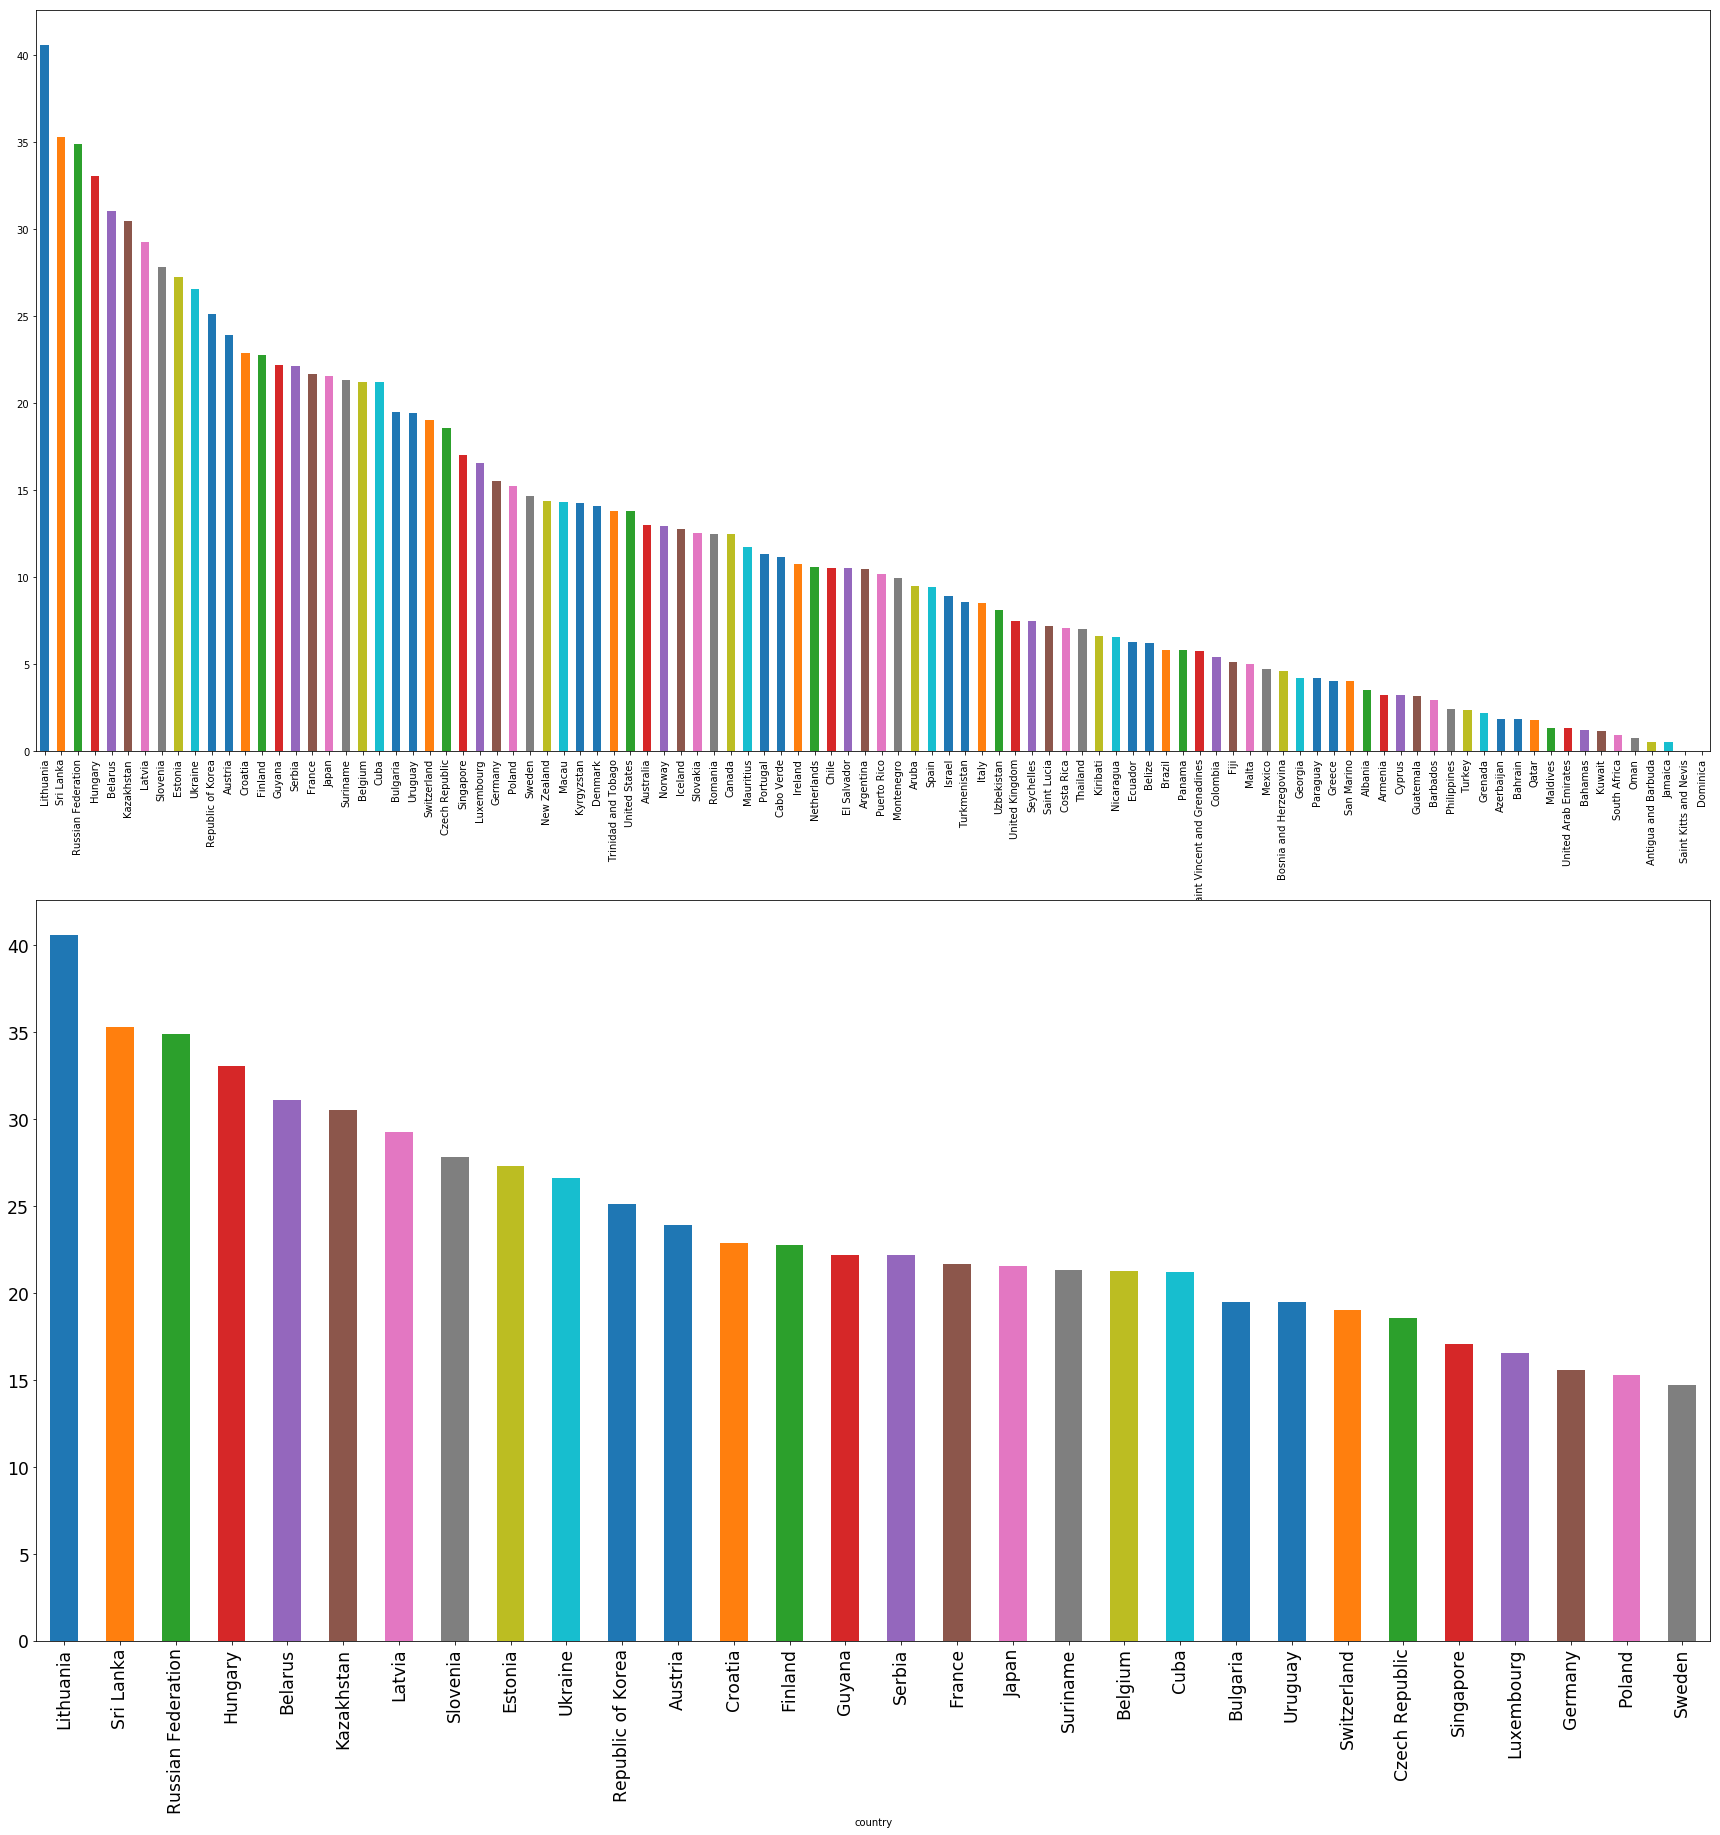

In [11]:
by_country = data.groupby(["country"]).mean()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 30))

by_country = by_country.sort_values(by=["suicides/100k pop"], ascending=False)
by_country["suicides/100k pop"].plot.bar(ax=axes[0])
plt.xticks(fontsize="xx-large", color="black")
plt.yticks(fontsize="xx-large")
plt.title("")

by_country["suicides/100k pop"][:30].plot.bar(ax=axes[1])

plt.show()


Patrząc na wykres uśrednionego współczynnika samobójstw/populacji w pirewszych 30 krajów widzimy bardzo dużo karajów europy wschodniej. Dlatego zastanawia mnie czy w dawnych karajach bloku wschodniego i w krajach sprzymierzonych istnieje większa szansa że w 100tysiącach popluacji wystąpi samobójca.  
                 
__Hipoteza zerowa:__ wpsółczynnik samobójca/100tysięcy populacji w dawnych krajach bloku wschodniego jest równy reszcie krajów.  
__Hipoteza alternatywna:__ współczynnik samobójca/100tysięcy populacji w dawnych krajach bloku wschodniego jest większy niż w reszcie krajów.


Kraje bloku wschodniego skopiowane z [wikipedii](https://en.wikipedia.org/wiki/Eastern_Bloc). 
Kraje wcześniej podzielone jak Jemen oraz Niemcy postanowiłem umieścić jako całość. 

In [12]:
eastern_bloc_countries = ['Afghanistan','Albania','Angola','Armenia','Azerbaijan',
                          'Benin','Bulgaria','Byelorussia','China','Congo','Cuba','Czechoslovakia','Germany',
                          'Estonia','Ethiopia','Georgia','Germany','Grenada','Hungary','Kampuchea','Kazakhstan',
                          'Kirghizia','Laos','Latvia','Lithuania','Moldavia','Mongolia','Mozambique','North Korea',
                          'Poland','Romania','Russia','Somalia','Tajikistan','Turkmenia','Ukraine',
                          'Uzbekistan','Vietnam','Yemen','Yugoslavia']

eastern_bloc = data[data["country"].isin( eastern_bloc_countries)]
rest = data[~data["country"].isin( eastern_bloc_countries)]
tstat, pvalue = stats.ttest_ind(eastern_bloc["suicides/100k pop"], rest["suicides/100k pop"])
print(f'T wartość {tstat}, P-wartość {pvalue}')

T wartość 19.549543701693903, P-wartość 1.5504876383019426e-84


Wykonując test dla T dla dwóch niezależnych próbek P-wartosć wyniosła $1.55 \times 10^{-84}$, a wynik testu 19.54.  Na poziomie istotności $\alpha =5\% $ mogę zdecydowanie odrzucić hipoteze zerową.

### Regresja  
##### HDI do samobójstwa/100tysięcy populacji  
HDI (ang. Human Development Index) jest wskaźnikiem rozwoju społecznego.  
Wartości wpływające na jego wartość:  
* przewidywana długość życia  
* jakość edukacji
* GDP kraju

__Zastanawiam się czy istnieje korelacja pomiędzy samobójstwami a stopniem rozwinięcia państwa.__  
Pogrupowałem dane wedługo roku i kraju, ponownie obliczając średnią ilość samobójstw na 100 tysięcy mieszkańców.

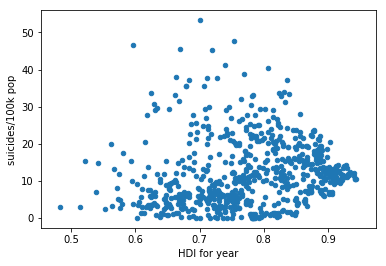

In [13]:
grouped = data.groupby(["year", "country"]).mean()
grouped = grouped.dropna()
grouped.plot.scatter("HDI for year", "suicides/100k pop")
plt.show()

In [14]:
grouped[["suicides/100k pop", "HDI for year"]].corr()

,suicides/100k pop,HDI for year
suicides/100k pop,1.000000,0.144934
HDI for year,0.144934,1.000000


Nie mogę stwierdzić zależnośći między rozwojem gospodarczym a samobójstwami. Współczynnik korelacji wyniosł __0.144__. 